In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
from datetime import timedelta, datetime

In [45]:
import xarray as xr

In [46]:
xr.set_options(keep_attrs=True) 

In [47]:
fn = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h0.2012-01.nc' 
#'/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h0.2012-02.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h0.2012-03.nc'
#, '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09
xr.open_dataset(fn)

<xarray.Dataset>
Dimensions:               (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33, time: 1)
Coordinates:
  * lat                   (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * zlon                  (zlon) float64 0.0
  * lon                   (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev                   (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                  (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time                  (time) datetime64[ns] 2012-02-01
Dimensions without coordinates: nbnd
Data variables: (12/1279)
    zlon_bnds             (zlon, nbnd) float64 ...
    gw                    (lat) float64 ...
    hyam                  (lev) float64 ...
    hybm                  (lev) float64 ...
    P0                    float64 ...
    hyai                  (ilev) float64 ...
    ...                    ...
    mmr_OM                (time, lev, lat, lon) float32 ...
    mmr_SALT              (time, lev, lat, lon) float32 ...
    mmr_SULFATE           (time, lev, lat, lon) float32 ...
    monoterp              (time, lev, lat, lon) float32 ...
    monoterp_SRF          (time, lat, lon) float32 ...
    odms                  (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f09_f09_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      spinup_freemet_f09_f09_mg17_from2000.cam.i.2011-01-01-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [80]:
from pathlib import Path

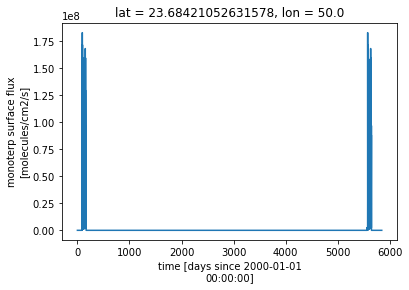

In [88]:
fn =Path('/proj/bolinc/users/x_sarbl/noresm_input_data/ems_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-2015_SFmonoterp.nc')
ds1 = xr.open_dataset(fn, decode_cf=False)

ds2 =ds1.copy()#['time']

ds2

dt = datetime(2015, month=1, day=1)-datetime(2000, month=1, day=1)

dt.days

ds2['time'] = ds2['time'] + dt.days

ds2['date'] = ds2['date'] + (20150101-ds2['date'].isel(time=0))

ds_con =xr.concat([ds1,ds2], dim='time')

ds_con.isel(lat=60, lon=20)['H10H16'].plot()

ds_con.to_netcdf(fn.parent / f'{fn.stem}_conc.nc')

In [90]:
fn =Path('/proj/bolinc/users/x_sarbl/noresm_input_data/ems_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-2015_SFisoprene.nc')
ds1 = xr.open_dataset(fn, decode_cf=False)

ds2 =ds1.copy()#['time']

ds2

dt = datetime(2015, month=1, day=1)-datetime(2000, month=1, day=1)

dt.days

ds2['time'] = ds2['time'] + dt.days

ds2['date'] = ds2['date'] + (20150101-ds2['date'].isel(time=0))

ds_con =xr.concat([ds1,ds2], dim='time')

#ds_con.isel(lat=60, lon=20)['H10H16'].plot()

ds_con.to_netcdf(fn.parent / f'{fn.stem}_conc.nc')

In [87]:
fn.parent / f'{fn.stem}_conc.nc'

PosixPath('/proj/bolinc/users/x_sarbl/noresm_input_data/ems_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-2015_SFmonoterp_conc.nc')

In [61]:
f = '/proj/cesm_input-data/inputdata//atm/cam/chem/emis/cmip6_emissions_version20180512/emissions_cmip6_noresm2_BC_N_anthrosurfALL_surface_1849-2015_1.9x2.5_version20180512.nc'

In [62]:
BC_N = xr.open_dataset(f)

In [68]:
BC_N#['time'].plot()

<xarray.Dataset>
Dimensions:               (lon: 144, lat: 96, time: 2004)
Coordinates:
  * lon                   (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                   (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * time                  (time) datetime64[ns] 1849-01-17 ... 2015-12-18
Data variables:
    emiss_anthrosurf_ALL  (time, lat, lon) float32 ...
    date                  (time) int32 18490116 18490216 ... 20151116 20151216
    datesec               (time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Attributes:
    domxmin:          0.0
    domxmax:          357.5
    x_units:          deg
    x_display_units:  Longitude deg
    domymin:          -90.0
    domymax:          90.0
    y_units:          deg
    y_display_units:  Latitude deg
    domtmin:          1.0
    domtmax:          12.0
    t_units:          month
    t_display_units:  Time month

In [54]:
xr.decode_cf(ds2)#['time']

<xarray.Dataset>
Dimensions:    (time: 17520, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:30:00
Dimensions without coordinates: nbnd
Data variables:
    H10H16     (time, lat, lon) float64 ...
    date       (time) int32 ...
    datesec    (time) int32 ...
    time_bnds  (time, nbnd) datetime64[ns] ...
Attributes: (12/13)
    Conventions:                CF-1.0
    source:                     CAM
    case:                       OsloAero_intBVOC_f19_f19_mg17_ssp245
    logname:                    x_sarbl
    host:                       
    initial_file:               OsloAero_intBVOC_f19_f19.cam.i.2015-01-01-000...
    ...                         ...
    model_doi_url:              https://doi.org/10.5065/D67H1H0V
    time_period_freq:           minute_30
    history:                    Thu Sep 29 10:52:07 2022: ncks -O -v date,H10...
    NCO:                        "4.6.3"
    nco_openmp_thread_number:   1
    history_of_appended_files:  Thu Sep 29 10:51:41 2022: Appended file /proj...

In [48]:
ds['time']

<xarray.DataArray 'time' (time: 17520)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T00:30:00.000000000',
       '2000-01-01T01:00:00.000000000', ..., '2000-12-30T22:30:00.000000000',
       '2000-12-30T23:00:00.000000000', '2000-12-30T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T23:30:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [49]:
ds = xr.decode_cf(ds)

In [51]:
ds

<xarray.Dataset>
Dimensions:    (time: 17520, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-12-30T23:30:00
Dimensions without coordinates: nbnd
Data variables:
    H10H16     (time, lat, lon) float64 ...
    date       (time) int32 ...
    datesec    (time) int32 ...
    time_bnds  (time, nbnd) datetime64[ns] ...
Attributes: (12/13)
    Conventions:                CF-1.0
    source:                     CAM
    case:                       OsloAero_intBVOC_f19_f19_mg17_ssp245
    logname:                    x_sarbl
    host:                       
    initial_file:               OsloAero_intBVOC_f19_f19.cam.i.2015-01-01-000...
    ...                         ...
    model_doi_url:              https://doi.org/10.5065/D67H1H0V
    time_period_freq:           minute_30
    history:                    Thu Sep 29 10:52:07 2022: ncks -O -v date,H10...
    NCO:                        "4.6.3"
    nco_openmp_thread_number:   1
    history_of_appended_files:  Thu Sep 29 10:51:41 2022: Appended file /proj...

In [33]:
ds['time'] = ds['time']-365#.plot()

In [34]:
ds = xr.decode_cf(ds)

In [40]:
ds['time']

<xarray.DataArray 'time' (time: 17520)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T00:29:59.999999998',
       '2000-01-01T01:00:00.000000001', ..., '2000-12-30T22:30:00.000000000',
       '2000-12-30T22:59:59.999999992', '2000-12-30T23:30:00.000000008'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T23:30:00.000000008
Attributes:
    long_name:  time
    bounds:     time_bnds

In [39]:
ds['date']-70000


<xarray.DataArray 'date' (time: 17520)>
array([20000101, 20000101, 20000101, ..., 20001231, 20001231, 20001231],
      dtype=int32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T23:30:00.000000008
Attributes:
    long_name:  current date (YYYYMMDD)

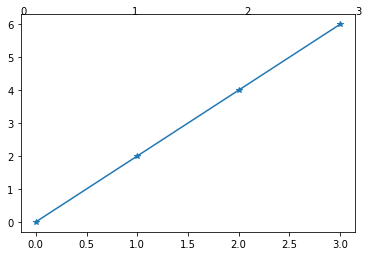

In [2]:
fig, ax = plt.subplots()

x = np.arange(4)
y = x*2
plt.plot(x,y, marker='*')
txt_ls = [f'{xi}' for xi in x]
for xi, yi, si in zip(x,y,txt_ls):
    
    plt.text(xi/max(x),1, si, transform=ax.transAxes) 

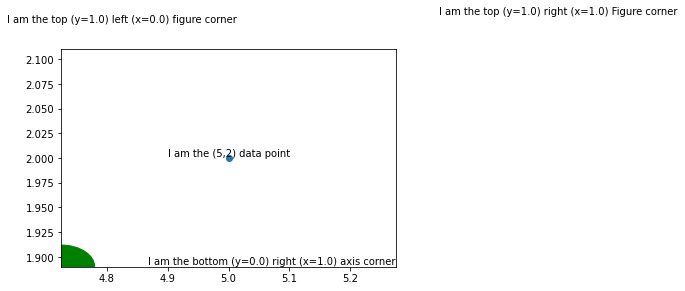

In [3]:
fig, ax = plt.subplots()

ax.plot([5.], [2.], 'o')

circle=plt.Circle((0, 0), 0.1, color="g",transform=ax.transAxes) #bottom (y=0) left (x=0) green circle of radius 0.1 (expressed in coord system)
ax.add_artist(circle)

ax.annotate('I am the top (y=1.0) right (x=1.0) Figure corner',
            xy=(1, 1), xycoords=fig.transFigure,
            xytext=(0.2, 0.2), textcoords='offset points',
            )

plt.text(  # position text relative to data
    5., 2., 'I am the (5,2) data point',  # x, y, text,
    ha='center', va='bottom',   # text alignment
    transform=ax.transData      # coordinate system transformation
)
plt.text(  # position text relative to Axes
    1.0, 0.0, 'I am the bottom (y=0.0) right (x=1.0) axis corner',
    ha='right', va='bottom',
    transform=ax.transAxes
)
plt.text(  # position text relative to Figure
    0.0, 1.0, 'I am the top (y=1.0) left (x=0.0) figure corner',
    ha='left', va='top',
    transform=fig.transFigure
)


plt.show()

In [4]:
fn = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_full/atm/hist/OsloAero_intBVOC_f19_f19_mg17_full.cam.h1.2013-01-02-00000.nc'

In [5]:
import xarray as xr

In [6]:
ds = xr.open_dataset(fn)

In [7]:
ds = ds.sel(time=slice('2008-01-02',None))

In [8]:
ds

<xarray.Dataset>
Dimensions:              (lat: 96, lon: 144, lev: 32, ilev: 33, cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10, cosp_ht: 40, cosp_sr: 15, cosp_sza: 5, cosp_dbze: 15, cosp_htmisr: 16, cosp_tau_modis: 7, cosp_reffice: 6, cosp_reffliq: 6, time: 48)
Coordinates: (12/16)
  * lat                  (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon                  (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                 (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 100.0
    ...                   ...
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5 ... 17.5 50.0
  * cosp_htmisr          (cosp_htmisr) float64 0.0 250.0 ... 1.6e+04 1.8e+04
  * cosp_tau_modis       (cosp_tau_modis) float64 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_reffice         (cosp_reffice) float64 5e-06 1.5e-05 ... 5e-05 7.5e-05
  * cosp_reffliq         (cosp_reffliq) float64 4e-06 9e-06 ... 1.75e-05 2.5e-05
  * time                 (time) datetime64[ns] 2013-01-02 ... 2013-01-03T23:0...
Dimensions without coordinates: nbnd
Data variables: (12/222)
    gw                   (lat) float64 ...
    hyam                 (lev) float64 ...
    hybm                 (lev) float64 ...
    P0                   float64 ...
    hyai                 (ilev) float64 ...
    hybi                 (ilev) float64 ...
    ...                   ...
    TOT_CLD_VISTAU       (time, lev, lat, lon) float32 ...
    TOT_ICLD_VISTAU      (time, lev, lat, lon) float32 ...
    U                    (time, lev, lat, lon) float32 ...
    V                    (time, lev, lat, lon) float32 ...
    isoprene             (time, lev, lat, lon) float32 ...
    monoterp             (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1

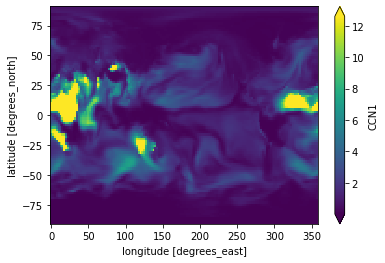

In [9]:
ds['CCN1'].mean(['time','lev']).plot(robust=True)

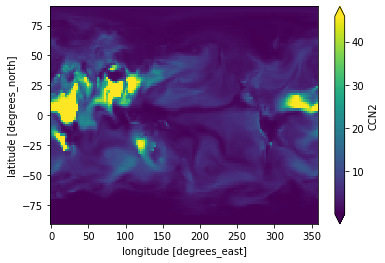

In [10]:
ds['CCN2'].mean(['time','lev']).plot(robust=True)

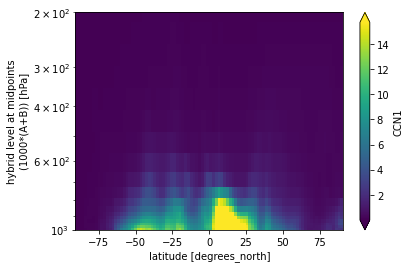

In [11]:
ds['CCN1'].mean(['time','lon']).plot(robust=True, yscale='log', ylim=[1000,200])

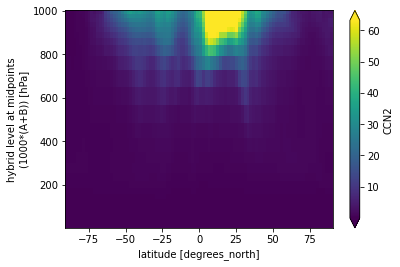

In [12]:
ds['CCN2'].mean(['time','lon']).plot(robust=True)

In [22]:
fp = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_f19_f19_mg17_test_act/atm/hist/*.h1.*.nc'

In [23]:
ds = xr.open_mfdataset(fp)

In [24]:
ds = ds.sel(time=slice('2008-01-02',None))

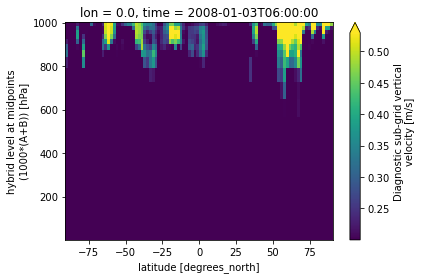

In [16]:
ds['WSUB'].isel(lon=0, time=10).plot(robust=True)


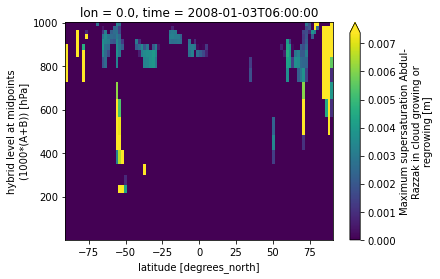

In [17]:
ds['Smax_incld'].isel(lon=0, time=10).plot(robust=True)


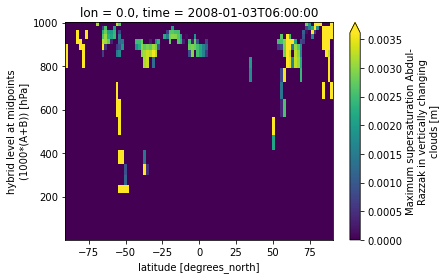

In [18]:
ds['Smax_cldv'].isel(lon=0, time=10).plot(robust=True)


In [19]:
ds['Smaxv_div'] = ds['Smax_cldv']/ds['Smax_cldv_supZero']
ds['Smaxv_div'] = ds['Smaxv_div'].where(ds['Smaxv_div']<np.inf)

In [20]:
ds['Smax_div'] = ds['Smax_incld']/ds['Smax_incld_supZero']
ds['Smax_div'] = ds['Smax_div'].where(ds['Smax_div']<np.inf)
ds['Smax_div'] = ds['Smax_div'].where(ds['Smax_div']<np.inf)

In [21]:
ds['Smax_div'].max().load()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


<xarray.DataArray 'Smax_div' ()>
array(10.555924, dtype=float32)

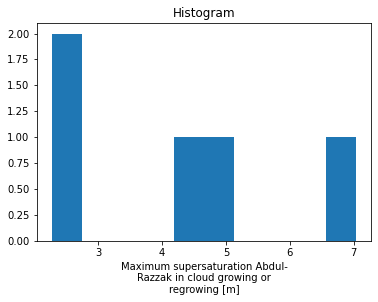

(array([7.449135e+06, 1.851000e+03, 1.120000e+02, 1.600000e+01,
        7.000000e+00, 2.000000e+00, 1.000000e+00, 4.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([0.        , 0.18473256, 0.3694651 , 0.55419767, 0.7389302 ,
        0.9236628 , 1.1083953 , 1.2931279 , 1.4778605 , 1.662593  ,
        1.8473256 ], dtype=float32),
 <BarContainer object of 10 artists>)

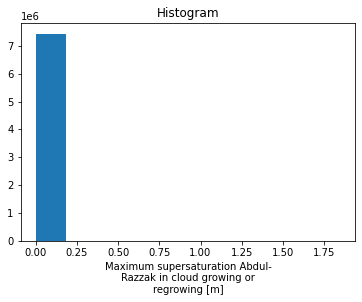

In [22]:
ds['Smax_incld'].sel(lev=slice(600,2000)).where(ds['Smax_incld']>2).plot.hist()
plt.show()

ds['Smax_incld'].sel(lev=slice(600,2000)).where(ds['Smax_incld']<2).plot.hist()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


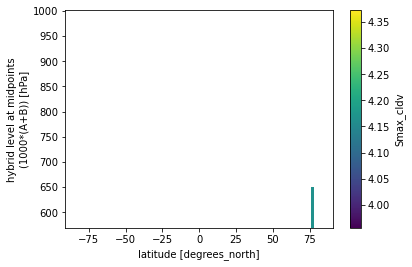

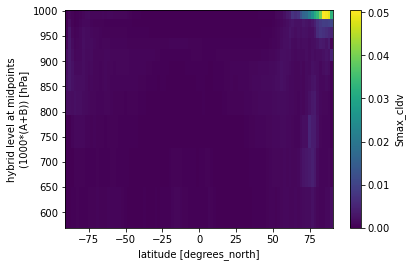

In [23]:
ds['Smax_cldv'].sel(lev=slice(600,2000)).where(ds['Smax_cldv']>2).mean(['lon','time']).plot()
plt.show()

ds['Smax_cldv'].sel(lev=slice(600,2000)).where(ds['Smax_cldv']<2).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


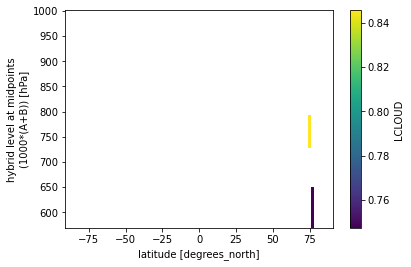

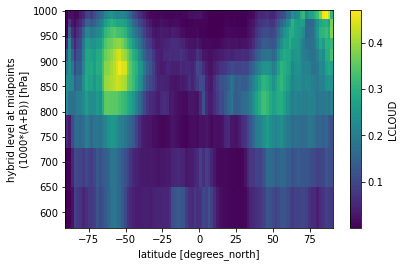

In [24]:
ds['LCLOUD'].sel(lev=slice(600,2000)).where(ds['Smax_incld']>2).mean(['lon','time']).plot()
plt.show()

ds['LCLOUD'].sel(lev=slice(600,2000)).where(ds['Smax_incld']<2).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


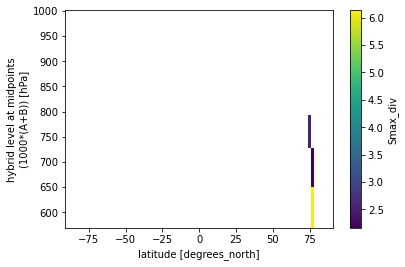

In [25]:
ds['Smax_div'].sel(lev=slice(600,2000)).where(ds['Smax_div']>2).mean(['lon','time']).plot()
plt.show()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


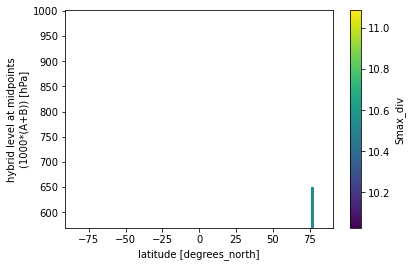

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


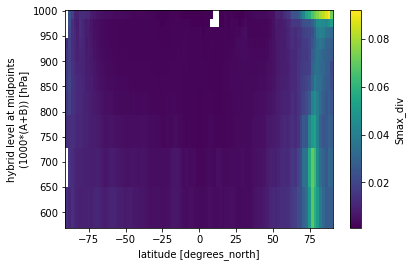

In [26]:
ds['Smax_div'].sel(lev=slice(600,2000)).where(ds['Smax_div']>10).mean(['lon','time']).plot()
plt.show()

ds['Smax_div'].sel(lev=slice(600,2000)).where(ds['Smax_div']<10).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


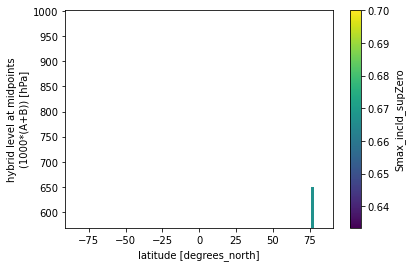

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


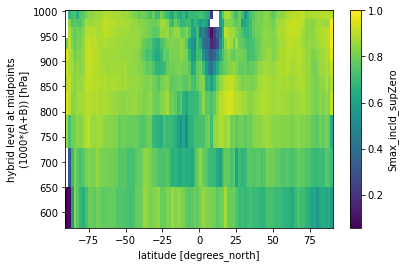

In [27]:
ds['Smax_incld_supZero'].sel(lev=slice(600,2000)).where(ds['Smax_div']>10).mean(['lon','time']).plot()
plt.show()

ds['Smax_incld_supZero'].sel(lev=slice(600,2000)).where(ds['Smax_div']<10).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


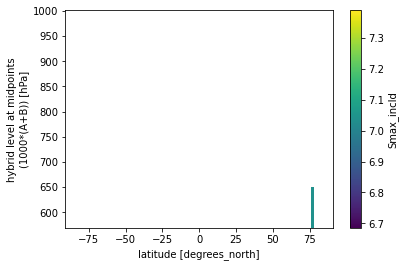

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


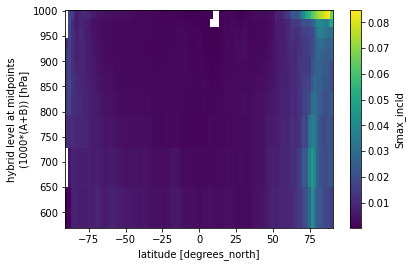

In [28]:
ds['Smax_incld'].sel(lev=slice(600,2000)).where(ds['Smax_div']>10).mean(['lon','time']).plot()
plt.show()

ds['Smax_incld'].sel(lev=slice(600,2000)).where(ds['Smax_div']<10).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


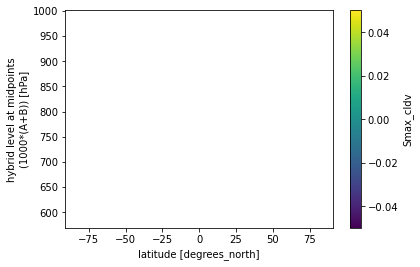

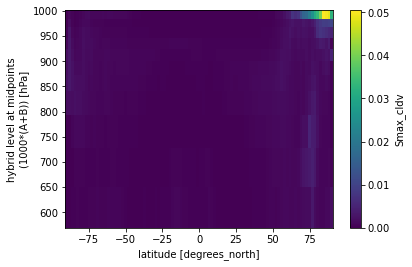

In [29]:
ds['Smax_cldv'].sel(lev=slice(600,2000)).where(ds['Smax_cldv']>10).mean(['lon','time']).plot()
plt.show()

ds['Smax_cldv'].sel(lev=slice(600,2000)).where(ds['Smax_cldv']<10).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


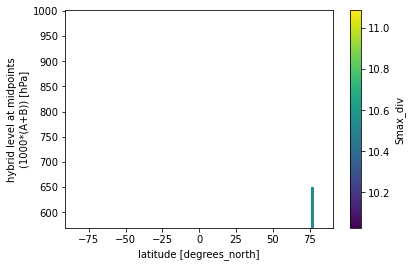

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


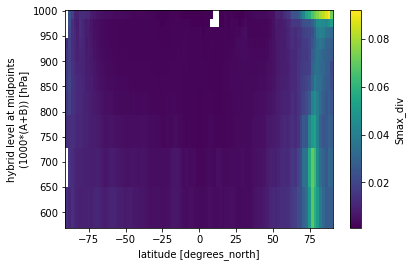

In [30]:
ds['Smax_div'].sel(lev=slice(600,2000)).where(ds['Smax_div']>10).mean(['lon','time']).plot(robust=True)
plt.show()

ds['Smax_div'].sel(lev=slice(600,2000)).where(ds['Smax_div']<10).mean(['lon','time']).plot()



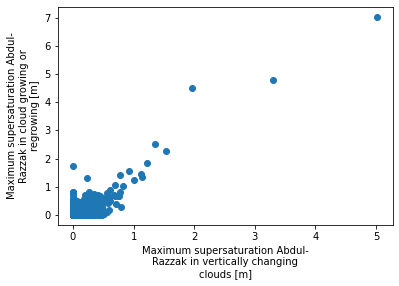

In [31]:
ds.plot.scatter(x = 'Smax_cldv', y='Smax_incld')

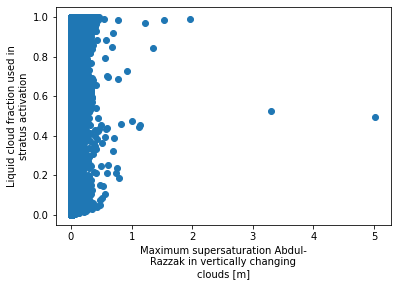

In [32]:
ds.plot.scatter(x = 'Smax_cldv', y='LCLOUD')

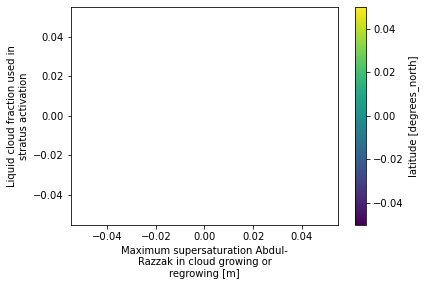

In [33]:
ds.where(ds['Smax_incld']>10, drop=True).plot.scatter(x = 'Smax_incld', y='LCLOUD', hue='lat')

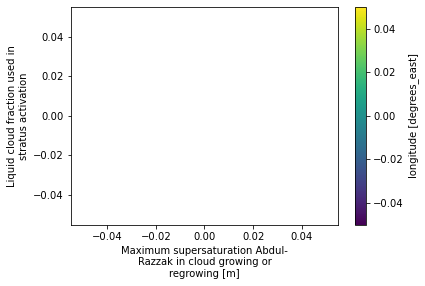

In [34]:
ds.where(ds['Smax_incld']>10, drop=True).plot.scatter(x = 'Smax_incld', y='LCLOUD', hue='lon')

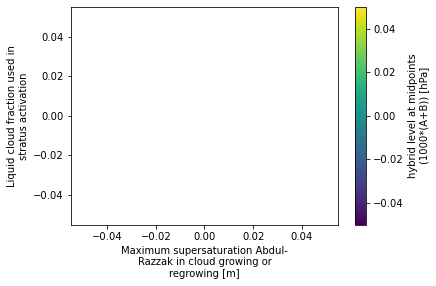

In [35]:
ds.where(ds['Smax_incld']>10, drop=True).plot.scatter(x = 'Smax_incld', y='LCLOUD', hue='lev')



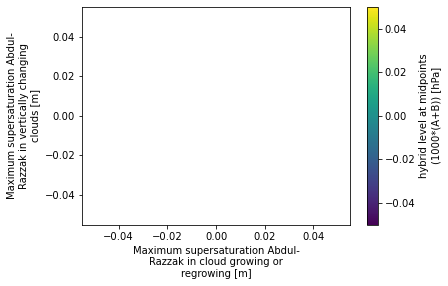

In [36]:
ds.where(ds['Smax_incld']>10, drop=True).plot.scatter(x = 'Smax_incld', y='Smax_cldv', hue='lev')



In [37]:
ds

<xarray.Dataset>
Dimensions:             (lat: 96, lon: 144, time: 49, lev: 32, ilev: 33, nbnd: 2)
Coordinates:
  * lat                 (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon                 (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                 (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time                (time) datetime64[ns] 2008-01-02 ... 2008-01-08
Dimensions without coordinates: nbnd
Data variables: (12/176)
    gw                  (time, lat) float64 dask.array<chunksize=(8, 96), meta=np.ndarray>
    hyam                (time, lev) float64 dask.array<chunksize=(8, 32), meta=np.ndarray>
    hybm                (time, lev) float64 dask.array<chunksize=(8, 32), meta=np.ndarray>
    P0                  (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai                (time, ilev) float64 dask.array<chunksize=(8, 33), meta=np.ndarray>
    hybi                (time, ilev) float64 dask.array<chunksize=(8, 33), meta=np.ndarray>
    ...                  ...
    WSUBI               (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    WTKE                (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    isoprene            (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    monoterp            (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    Smaxv_div           (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    Smax_div            (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_f19_f19_mg17_test_act
    logname:           x_sarbl
    host:              
    initial_file:      /proj/cesm_input-data/inputdata//atm/cam/inic/fv/cami-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_3

In [38]:
ds

<xarray.Dataset>
Dimensions:             (lat: 96, lon: 144, time: 49, lev: 32, ilev: 33, nbnd: 2)
Coordinates:
  * lat                 (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon                 (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                 (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time                (time) datetime64[ns] 2008-01-02 ... 2008-01-08
Dimensions without coordinates: nbnd
Data variables: (12/176)
    gw                  (time, lat) float64 dask.array<chunksize=(8, 96), meta=np.ndarray>
    hyam                (time, lev) float64 dask.array<chunksize=(8, 32), meta=np.ndarray>
    hybm                (time, lev) float64 dask.array<chunksize=(8, 32), meta=np.ndarray>
    P0                  (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai                (time, ilev) float64 dask.array<chunksize=(8, 33), meta=np.ndarray>
    hybi                (time, ilev) float64 dask.array<chunksize=(8, 33), meta=np.ndarray>
    ...                  ...
    WSUBI               (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    WTKE                (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    isoprene            (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    monoterp            (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    Smaxv_div           (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
    Smax_div            (time, lev, lat, lon) float32 dask.array<chunksize=(8, 32, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_f19_f19_mg17_test_act
    logname:           x_sarbl
    host:              
    initial_file:      /proj/cesm_input-data/inputdata//atm/cam/inic/fv/cami-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_3

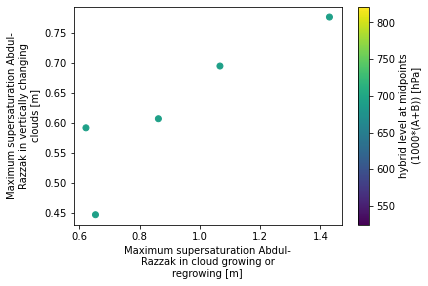

In [39]:
_ds = ds.where(ds['Smax_incld']>.6, drop=True)
_ds = _ds.isel(time=slice(10,None))
#_ds = _ds.where(ds['lev']<900)
#_ds = _ds.where(ds['lev']>400)
_ds.plot.scatter(x = 'Smax_incld', y='Smax_cldv', hue='lev')



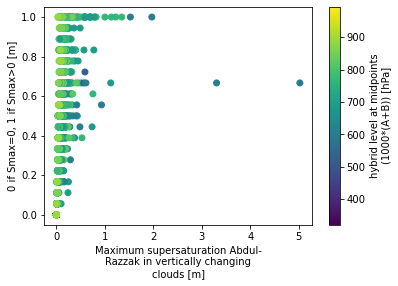

In [40]:
_ds = ds.where(ds['Smax_incld']>.1, drop=True)
_ds = _ds.where(ds['lev']<900)
#_ds = _ds.where(ds['lev']>900)
_ds.plot.scatter(x = 'Smax_cldv', y='Smax_cldv_supZero', hue='lev')



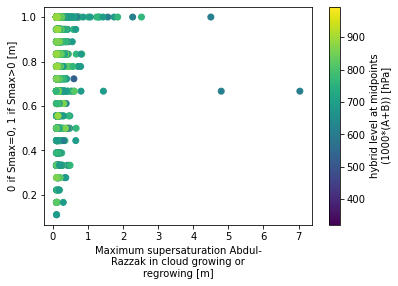

In [41]:
_ds = ds.where(ds['Smax_incld']>.1, drop=True)
_ds = _ds.where(ds['lev']<900)
#_ds = _ds.where(ds['lev']>900)
_ds.plot.scatter(x = 'Smax_incld', y='Smax_incld_supZero', hue='lev')



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


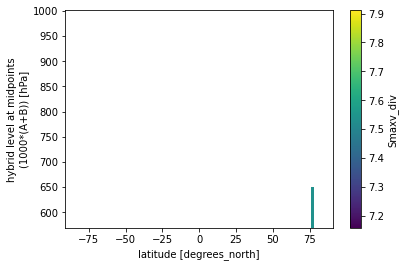

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


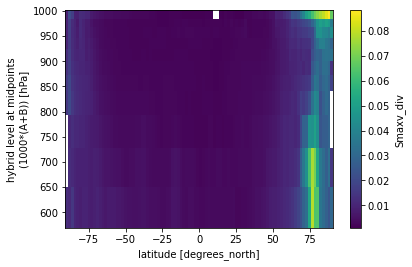

In [42]:
ds['Smaxv_div'].sel(lev=slice(600,2000)).where(ds['Smaxv_div']>5).mean(['lon','time']).plot(robust=True)
plt.show()

ds['Smaxv_div'].sel(lev=slice(600,2000)).where(ds['Smaxv_div']<5).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


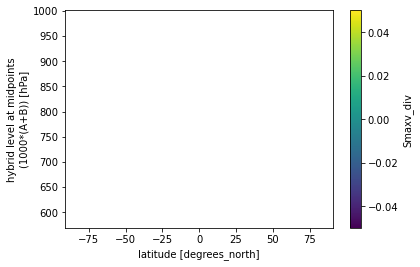

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


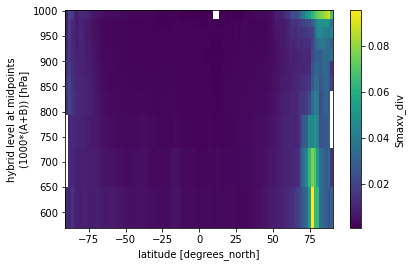

In [43]:
ds['Smaxv_div'].sel(lev=slice(600,2000)).where(ds['Smaxv_div']>10).mean(['lon','time']).plot(robust=True)
plt.show()

ds['Smaxv_div'].sel(lev=slice(600,2000)).where(ds['Smaxv_div']<10).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


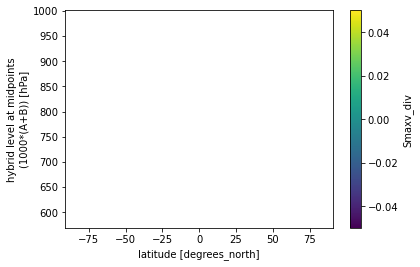

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


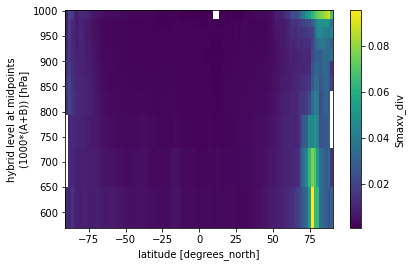

In [44]:
ds['Smaxv_div'].sel(lev=slice(600,2000)).where(ds['Smaxv_div']>1000).mean(['lon','time']).plot(robust=True)
plt.show()

ds['Smaxv_div'].sel(lev=slice(600,2000)).where(ds['Smaxv_div']<10).mean(['lon','time']).plot()



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


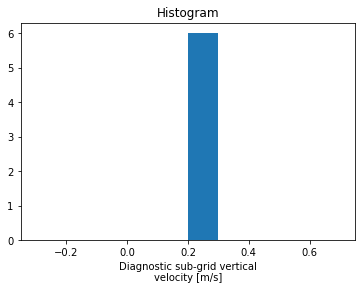

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


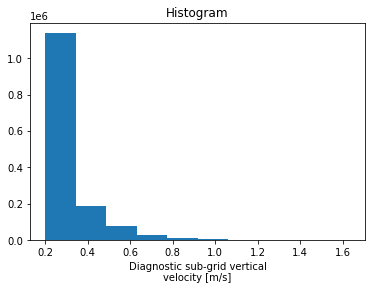

In [45]:
ds['WSUB'].sel(lev=slice(600,2000)).where(ds['Smax_div']>2).plot.hist()
plt.show()

ds['WSUB'].sel(lev=slice(600,2000)).where(ds['Smax_div']<2).plot.hist();

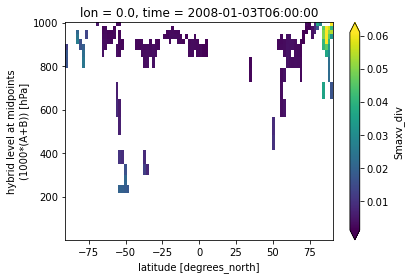

In [46]:
ds['Smaxv_div'].isel(lon=0, time=10).plot(robust=True)


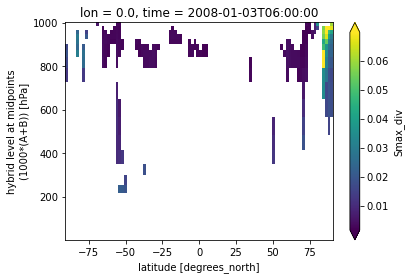

In [47]:
ds['Smax_div'].isel(lon=0, time=10).plot(robust=True)


(array([1.707655e+06, 1.900000e+01, 3.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([2.6328978e-04, 1.0558294e+00, 2.1113956e+00, 3.1669617e+00,
        4.2225275e+00, 5.2780938e+00, 6.3336601e+00, 7.3892260e+00,
        8.4447918e+00, 9.5003586e+00, 1.0555924e+01], dtype=float32),
 <BarContainer object of 10 artists>)

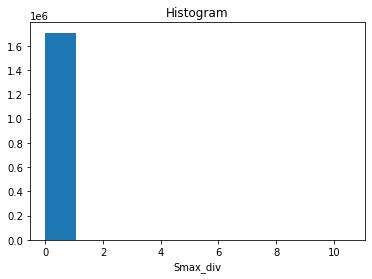

In [48]:
ds['Smax_div'].plot.hist()

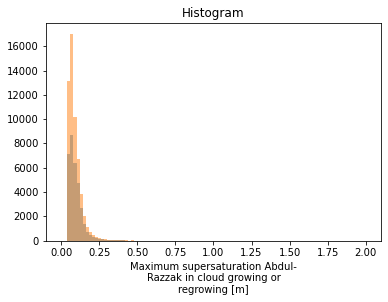

In [49]:
ds['Smax_cldv'].sel(lev=slice(400,2000)).where(ds['Smax_cldv']>0.05).plot.hist(range=[0,2], bins=100, alpha=.5);
ds['Smax_incld'].sel(lev=slice(400,2000)).where(ds['Smax_incld']>0.05).plot.hist(range=[0,2], bins=100, alpha=.5);



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


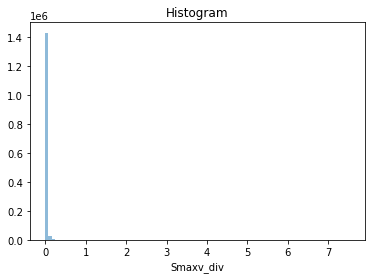

In [50]:
ds['Smaxv_div'].sel(lev=slice(400,2000)).plot.hist( bins=100, alpha=.5);
#ds['Smax_div'].sel(lev=slice(400,2000)).where(ds['Smax_cldv']>0.05).plot.hist(range=[0,2], bins=100, alpha=0.5);


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


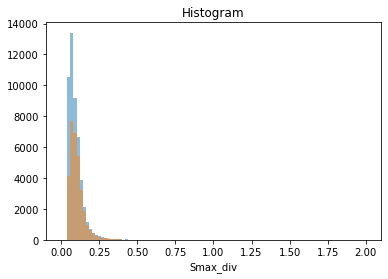

In [51]:
ds['Smaxv_div'].sel(lev=slice(400,2000)).where(ds['Smaxv_div']>0.05).plot.hist(range=[0,2], bins=100, alpha=.5);
ds['Smax_div'].sel(lev=slice(400,2000)).where(ds['Smax_cldv']>0.05).plot.hist(range=[0,2], bins=100, alpha=0.5);





/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


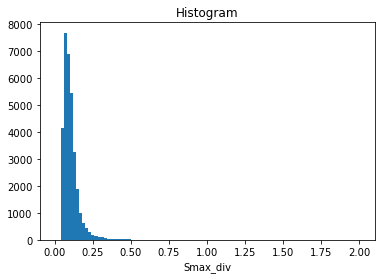

In [52]:
ds['Smax_div'].sel(lev=slice(400,2000)).where(ds['Smax_cldv']>0.05).plot.hist(range=[0,2], bins=100);


In [53]:
ds['WTKE_div'] = ds['WTKE']/ds['Smax_incld_supZero']
ds['WTKE_div'] = ds['WTKE_div'].where(ds['WTKE_div']<np.inf)

In [54]:
ds['WSUB_div'] = ds['WSUB']/ds['Smax_incld_supZero']
ds['WSUB_div'] = ds['WSUB_div'].where(ds['WSUB_div']<np.inf)

In [55]:
ds['WTKE_div'].isel(lon=0,time=10).load()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


<xarray.DataArray 'WTKE_div' (lev: 32, lat: 96)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.224446  , 0.20738047,
        0.2       ],
       [       nan,        nan,        nan, ..., 0.46057102, 0.7647131 ,
        0.21563554],
       [       nan,        nan,        nan, ...,        nan,        nan,
        1.4283442 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
    lon      float64 0.0
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
    time     datetime64[ns] 2008-01-03T06:00:00

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


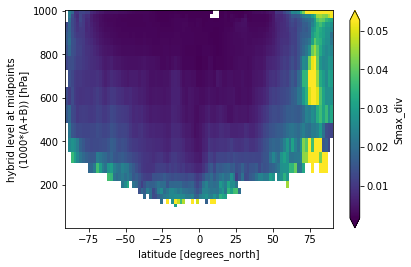

In [56]:
ds['Smax_div'].mean(['lon','time']).plot(robust=True)

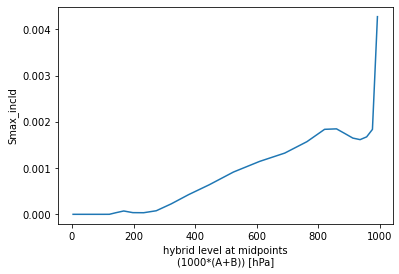

In [57]:
ds['Smax_incld'].mean(['lon','time', 'lat']).plot()#robust=True)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


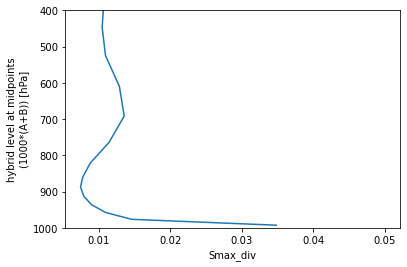

In [58]:
ds['Smax_div'].mean(['lon','time', 'lat']).plot(y='lev', ylim =[1000,400])#robust=True)
#plt.xlim([1.5,4])

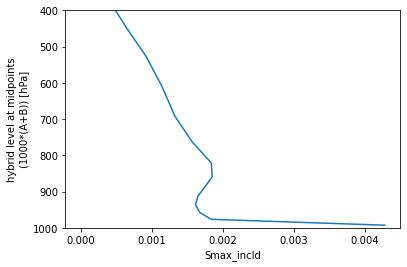

In [59]:
ds['Smax_incld'].mean(['lon','time', 'lat']).plot(y='lev', ylim =[1000,400])#robust=True)


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


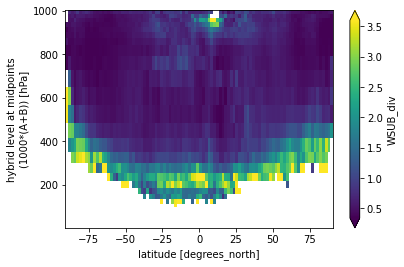

In [60]:
ds['WSUB_div'].mean(['lon','time']).plot(robust=True)

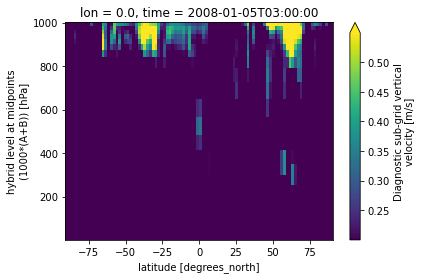

In [61]:
ds['WSUB'].isel(lon=0, time =25).plot(robust=True)

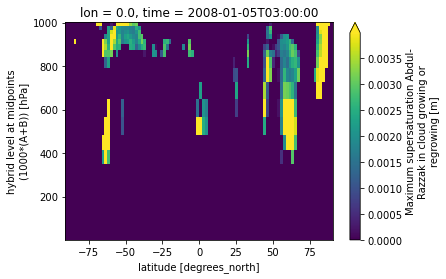

In [62]:
ds['Smax_incld'].isel(lon=0, time =25).plot(robust=True)

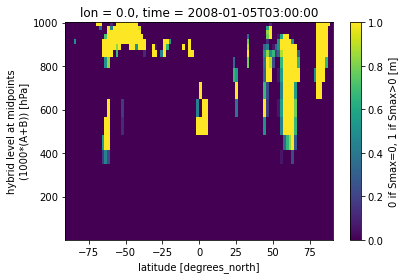

In [63]:
ds['Smax_incld_supZero'].isel(lon=0, time =25).plot(robust=True)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


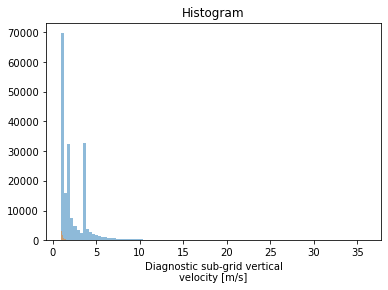

In [64]:
ds['WSUB_div'].where(ds['WSUB_div']>1).plot.hist(bins=100, alpha=.5,);

ds['WSUB'].where(ds['WSUB']>1).plot.hist(bins=100, alpha=0.5, );

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


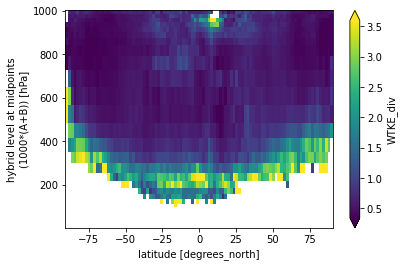

In [65]:
ds['WTKE_div'].mean(['lon','time']).plot(robust=True)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


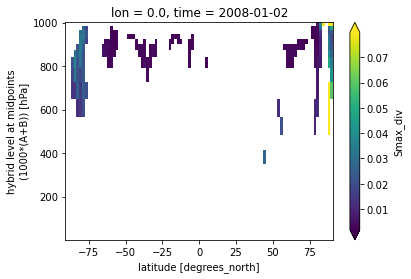

In [66]:
ds['Smax_div'].isel(lon=0, time=0).plot(robust=True)

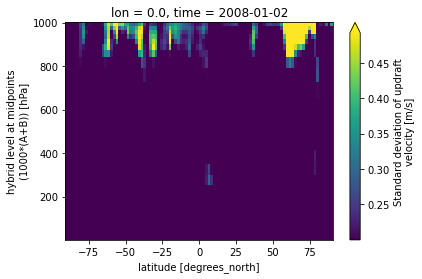

In [67]:
ds['WTKE'].isel(lon=0, time=0).plot(robust=True)


In [1]:
import xarray as xr

In [2]:
fp1 = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_f19_f19_mg17_test_act/atm/hist/OsloAero_f19_f19_mg17_test_act.cam.h1.2008-01-03-00000.nc'
fp2 = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_f19_f19_mg17_test_act/atm/hist/OsloAero_f19_f19_mg17_test_act.cam.h2.2008-01-03-00000.nc'


In [3]:
ds1 = xr.open_dataset(fp1)
ds2 = xr.open_dataset(fp2)

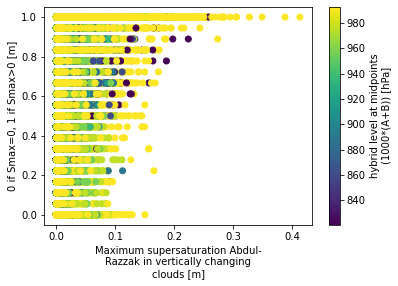

In [4]:
_ds = ds1.where(ds1['Smax_incld']>-1, drop=True)
_ds = _ds.where(_ds['lev']>800, drop=True)
#_ds = _ds.where(ds['lev']>900)
_ds.plot.scatter(x = 'Smax_cldv', y='Smax_incld_supZero', hue='lev')



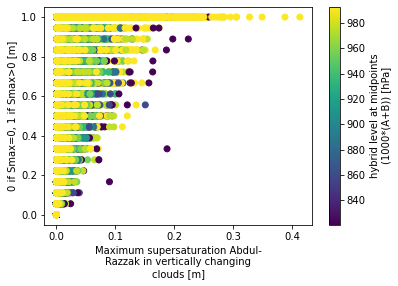

In [5]:
_ds = ds1.where(ds1['Smax_incld']>-1, drop=True)
_ds = _ds.sel(lev=slice(800,None))#where(_ds['lev']>800, drop=True)
#_ds = _ds.where(ds['lev']>900)
_ds.plot.scatter(x = 'Smax_cldv', y='Smax_cldv_supZero', hue='lev')



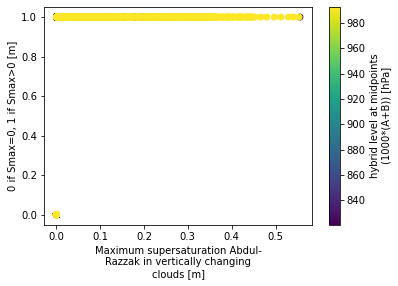

In [6]:
_ds = ds2.where(ds2['Smax_incld']>-1, drop=True)
_ds = _ds.sel(lev=slice(800,None))#where(_ds['lev']>800, drop=True)

#_ds = _ds.where(ds['lev']>900)
_ds.plot.scatter(x = 'Smax_cldv', y='Smax_cldv_supZero', hue='lev')



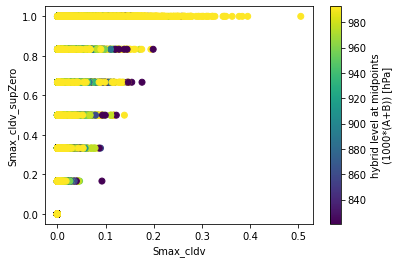

In [7]:
_ds = ds2.where(ds2['Smax_incld']>-1, drop=True)
_ds = _ds.sel(lev=slice(800,None))#where(_ds['lev']>800, drop=True)

#_ds = _ds.where(ds['lev']>900)
_ds.resample({'time':'3h'}).mean().plot.scatter(x = 'Smax_cldv', y='Smax_cldv_supZero', hue='lev')



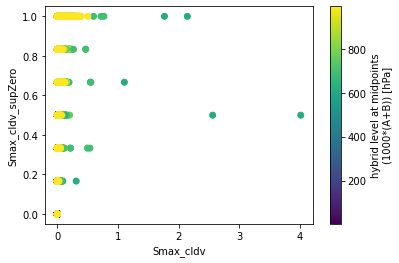

In [8]:
_ds = ds2.copy()#where(ds2['Smax_incld']>-1, drop=True)
#_ds = _ds.where(_ds['lev']>900, drop=True)
#_ds = _ds.where(ds['lev']>900)
_ds.resample({'time':'3h'}).mean().plot.scatter(x = 'Smax_cldv', y='Smax_cldv_supZero', hue='lev')



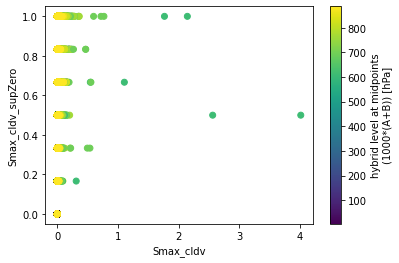

In [25]:
_ds = ds2.where(ds2['Smax_incld']>-1, drop=True)
_ds = _ds.where(_ds['lev']<900, drop=True)
#_ds = _ds.where(ds['lev']>900)
_ds.resample({'time':'3h'}).mean().plot.scatter(x = 'Smax_cldv', y='Smax_cldv_supZero', hue='lev')



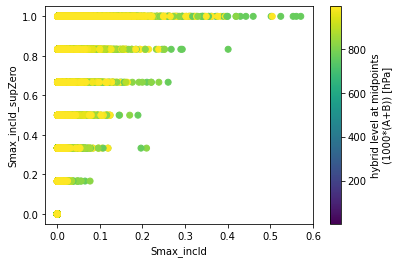

In [21]:
_ds = ds2.where(ds2['Smax_incld']>-1, drop=True)
_ds = _ds.where(_ds['lev']>700)
#_ds = _ds.where(ds['lev']>900)
_ds.resample({'time':'3h'}).mean().plot.scatter(x = 'Smax_incld', y='Smax_incld_supZero', hue='lev')



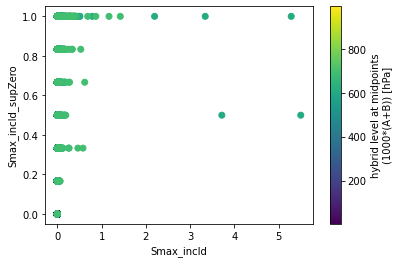

In [27]:
_ds = ds2.where(ds2['Smax_incld']>-1, drop=True)
_ds = _ds.where(_ds['lev']<700)
#_ds = _ds.where(ds['lev']>900)
_ds.resample({'time':'3h'}).mean().plot.scatter(x = 'Smax_incld', y='Smax_incld_supZero', hue='lev')



In [ ]:
_ds = ds2.where(ds2['Smax_incld']>-1, drop=True)
_ds = _ds.where(_ds['lev']<700)
#_ds = _ds.where(ds['lev']>900)
_ds.resample({'time':'3h'}).mean().plot.scatter(x = 'Smax_incld', y='Smax_incld_supZero', hue='lev')



In [ ]:
_ds = ds1.copy()#.where(ds['Smax_incld']>-1, drop=True)
_ds = _ds.where(_ds['lev']>800, drop=True)
#_ds = _ds.where(ds['lev']>900)
_ds.plot.scatter(x = 'Smax_incld', y='Smax_incld_supZero')#, hue='lev')



In [73]:
ds2 = xr.open_mfdataset(fp)

In [ ]:
ds2['NNAT_1'].sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

(1e-6*ds['NCONC01']).sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

In [ ]:
ds2['NNAT_4'].sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

(1e-6*ds['NCONC04']).sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

In [ ]:
ds2['NNAT_1'].sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

(1e-6*ds['NCONC01']).sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

In [ ]:
ds2['NNAT_12'].sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

(1e-6*ds['NCONC12']).sel(lat=60,lon=20,method='nearest').isel(lev=-1).plot()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fn ='/proj/cesm_input-data/inputdata//lnd/clm2/surfdata_map/surfdata_1.9x2.5_78pfts_CMIP6_simyr1850_c170824.nc'

ds_l = xr.open_dataset(fn)

In [ ]:

ds_l['PCT_NAT_PFT'].isel(natpft=1).plot(robust=True)

In [ ]:
ds_l['LONGXY'].plot()
plt.show()

ds_l['LATIXY'].plot()

In [ ]:
ds_l['lsmlat'] = ds_l['LATIXY'].isel(lsmlon=0)

ds_l['lsmlon'] = ds_l['LONGXY'].isel(lsmlat=0)

In [ ]:
ds_l

In [ ]:
for i in 
ds_l['PCT_NAT_PFT'].isel(natpft=1).plot(robust=True)

In [ ]:
lsmlat